In [ ]:
%pip install -r ../requirements.txt

In [1]:
from schema import WLD

wld = WLD(file_path="../data/example-chappy.wld")

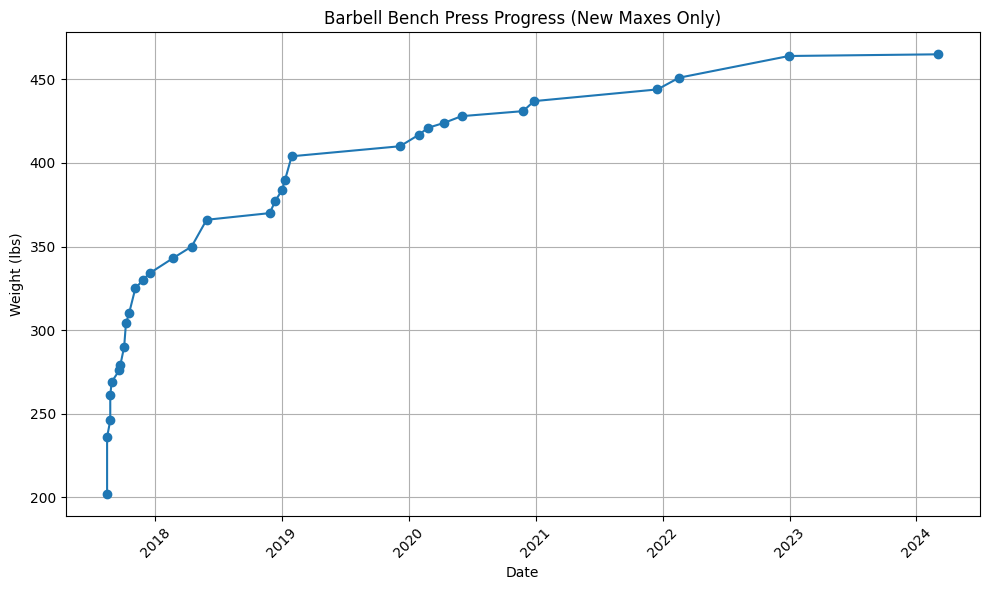

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect bench press data
bench_data = []
for workout in wld.workouts:
    for exercise in workout.exercises:
        if exercise.name == "Barbell Bench Press":
            for set_data in exercise.sets:
                if set_data.weight is not None:  # Only include sets with weight data
                    bench_data.append({"date": workout.date, "weight": set_data.oneRM})

# Convert to DataFrame and sort by date
df = pd.DataFrame(bench_data)
df = df.sort_values("date")

# Plot max weight over all time (showing only when a new max is achieved)
running_max = 0
max_data = []
for _, row in df.iterrows():
    if row["weight"] > running_max:
        running_max = row["weight"]
        max_data.append({"date": row["date"], "weight": row["weight"]})

max_df = pd.DataFrame(max_data)

plt.figure(figsize=(10, 6))
plt.plot(max_df["date"], max_df["weight"], marker="o")
plt.title("Barbell Bench Press Progress (New Maxes Only)")
plt.xlabel("Date")
plt.ylabel("Weight (lbs)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

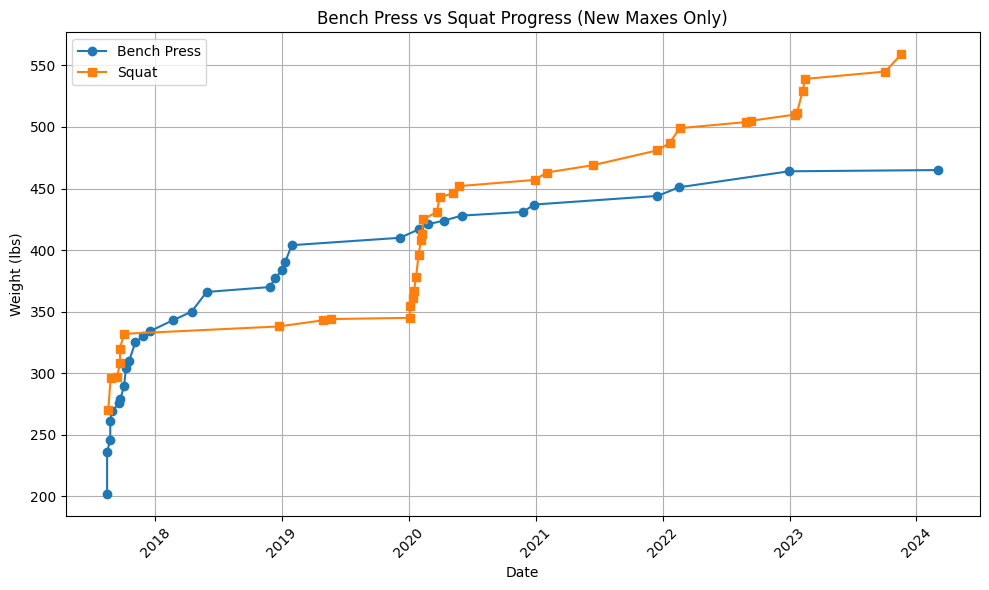

In [3]:
# Collect squat data
squat_data = []
for workout in wld.workouts:
    for exercise in workout.exercises:
        if exercise.name == "Squats":
            for set_data in exercise.sets:
                if set_data.weight is not None:  # Only include sets with weight data
                    squat_data.append({"date": workout.date, "weight": set_data.oneRM})

# Check if we have any squat data
if not squat_data:
    print("No squat data found")
    # Plot bench press data only
    plt.figure(figsize=(10, 6))
    plt.plot(max_df["date"], max_df["weight"], marker="o", label="Bench Press")
    plt.title("Bench Press Progress (New Maxes Only)")
else:
    # Convert to DataFrame and sort by date
    squat_df = pd.DataFrame(squat_data)
    squat_df = squat_df.sort_values("date")

    # Get max squat data points
    squat_running_max = 0
    squat_max_data = []
    for _, row in squat_df.iterrows():
        if row["weight"] > squat_running_max:
            squat_running_max = row["weight"]
            squat_max_data.append({"date": row["date"], "weight": row["weight"]})

    squat_max_df = pd.DataFrame(squat_max_data)

    # Plot both bench and squat progress
    plt.figure(figsize=(10, 6))
    plt.plot(max_df["date"], max_df["weight"], marker="o", label="Bench Press")
    plt.plot(squat_max_df["date"], squat_max_df["weight"], marker="s", label="Squat")
    plt.title("Bench Press vs Squat Progress (New Maxes Only)")

# Common plotting settings
plt.xlabel("Date")
plt.ylabel("Weight (lbs)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

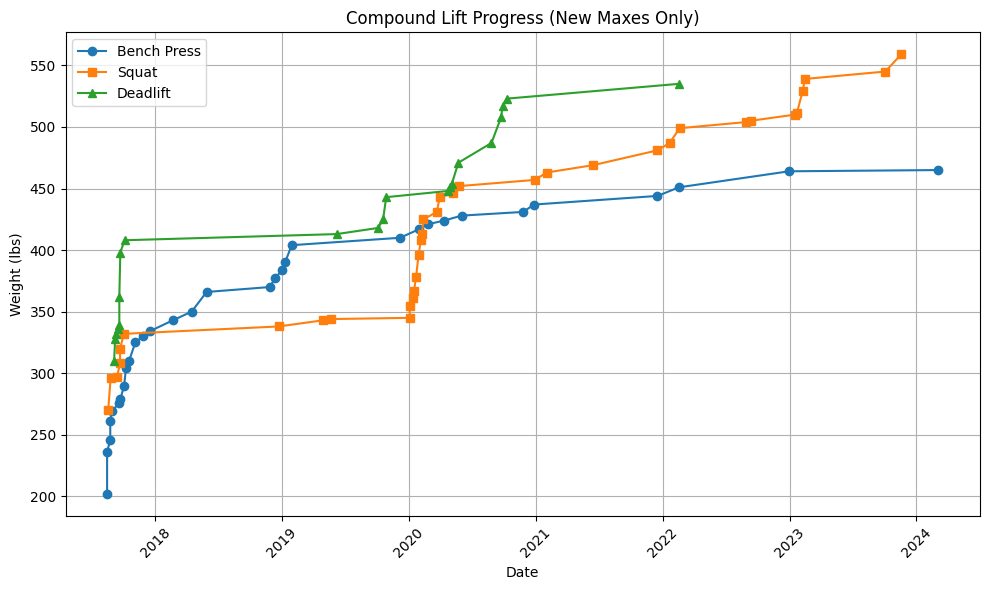

In [4]:
# Collect deadlift data
deadlift_data = []
for workout in wld.workouts:
    for exercise in workout.exercises:
        if exercise.name == "Deadlifts":
            for set_data in exercise.sets:
                if set_data.weight is not None:  # Only include sets with weight data
                    deadlift_data.append({"date": workout.date, "weight": set_data.oneRM})

# Check if we have any deadlift data
if not deadlift_data:
    print("No deadlift data found")
else:
    # Convert to DataFrame and sort by date
    deadlift_df = pd.DataFrame(deadlift_data)
    deadlift_df = deadlift_df.sort_values("date")

    # Get max deadlift data points
    deadlift_running_max = 0
    deadlift_max_data = []
    for _, row in deadlift_df.iterrows():
        if row["weight"] > deadlift_running_max:
            deadlift_running_max = row["weight"]
            deadlift_max_data.append({"date": row["date"], "weight": row["weight"]})

    deadlift_max_df = pd.DataFrame(deadlift_max_data)

    # Plot bench, squat, and deadlift progress
    plt.figure(figsize=(10, 6))
    plt.plot(max_df["date"], max_df["weight"], marker="o", label="Bench Press")
    if "squat_max_df" in locals():
        plt.plot(squat_max_df["date"], squat_max_df["weight"], marker="s", label="Squat")
    plt.plot(deadlift_max_df["date"], deadlift_max_df["weight"], marker="^", label="Deadlift")
    plt.title("Compound Lift Progress (New Maxes Only)")
    plt.xlabel("Date")
    plt.ylabel("Weight (lbs)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


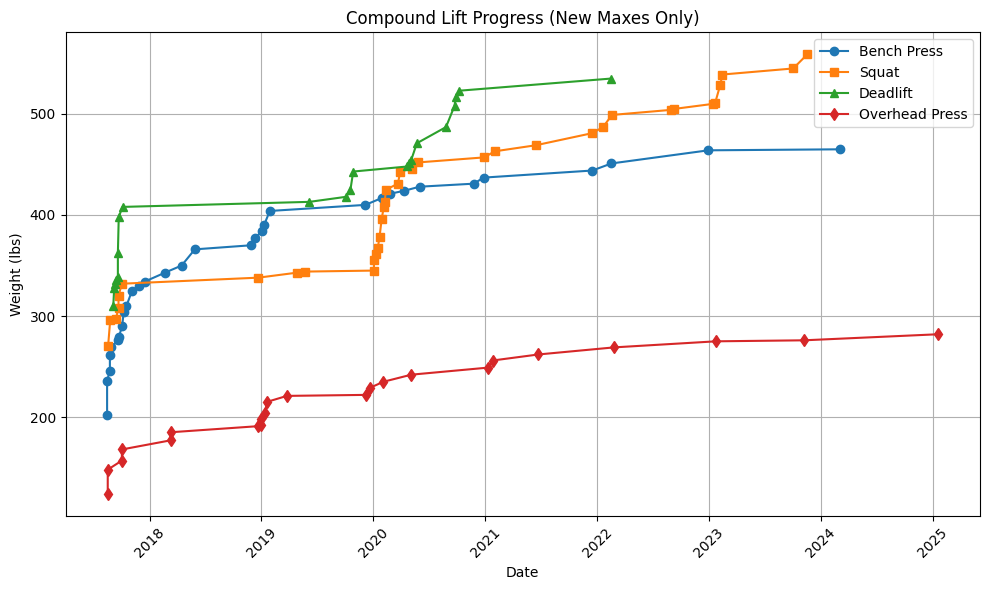

In [5]:
# Collect overhead press data
ohp_data = []
for workout in wld.workouts:
    for exercise in workout.exercises:
        if exercise.name == "Overhead Press" and exercise.iteration == "Barbell":
            for set_data in exercise.sets:
                if set_data.weight is not None:  # Only include sets with weight data
                    ohp_data.append({"date": workout.date, "weight": set_data.oneRM})

# Check if we have any OHP data
if not ohp_data:
    print("No overhead press data found")
else:
    # Convert to DataFrame and sort by date
    ohp_df = pd.DataFrame(ohp_data)
    ohp_df = ohp_df.sort_values("date")

    # Get max OHP data points
    ohp_running_max = 0
    ohp_max_data = []
    for _, row in ohp_df.iterrows():
        if row["weight"] > ohp_running_max:
            ohp_running_max = row["weight"]
            ohp_max_data.append({"date": row["date"], "weight": row["weight"]})

    ohp_max_df = pd.DataFrame(ohp_max_data)

    # Plot all compound lift progress
    plt.figure(figsize=(10, 6))
    plt.plot(max_df["date"], max_df["weight"], marker="o", label="Bench Press")
    if "squat_max_df" in locals():
        plt.plot(squat_max_df["date"], squat_max_df["weight"], marker="s", label="Squat")
    plt.plot(deadlift_max_df["date"], deadlift_max_df["weight"], marker="^", label="Deadlift")
    plt.plot(ohp_max_df["date"], ohp_max_df["weight"], marker="d", label="Overhead Press")
    plt.title("Compound Lift Progress (New Maxes Only)")
    plt.xlabel("Date")
    plt.ylabel("Weight (lbs)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


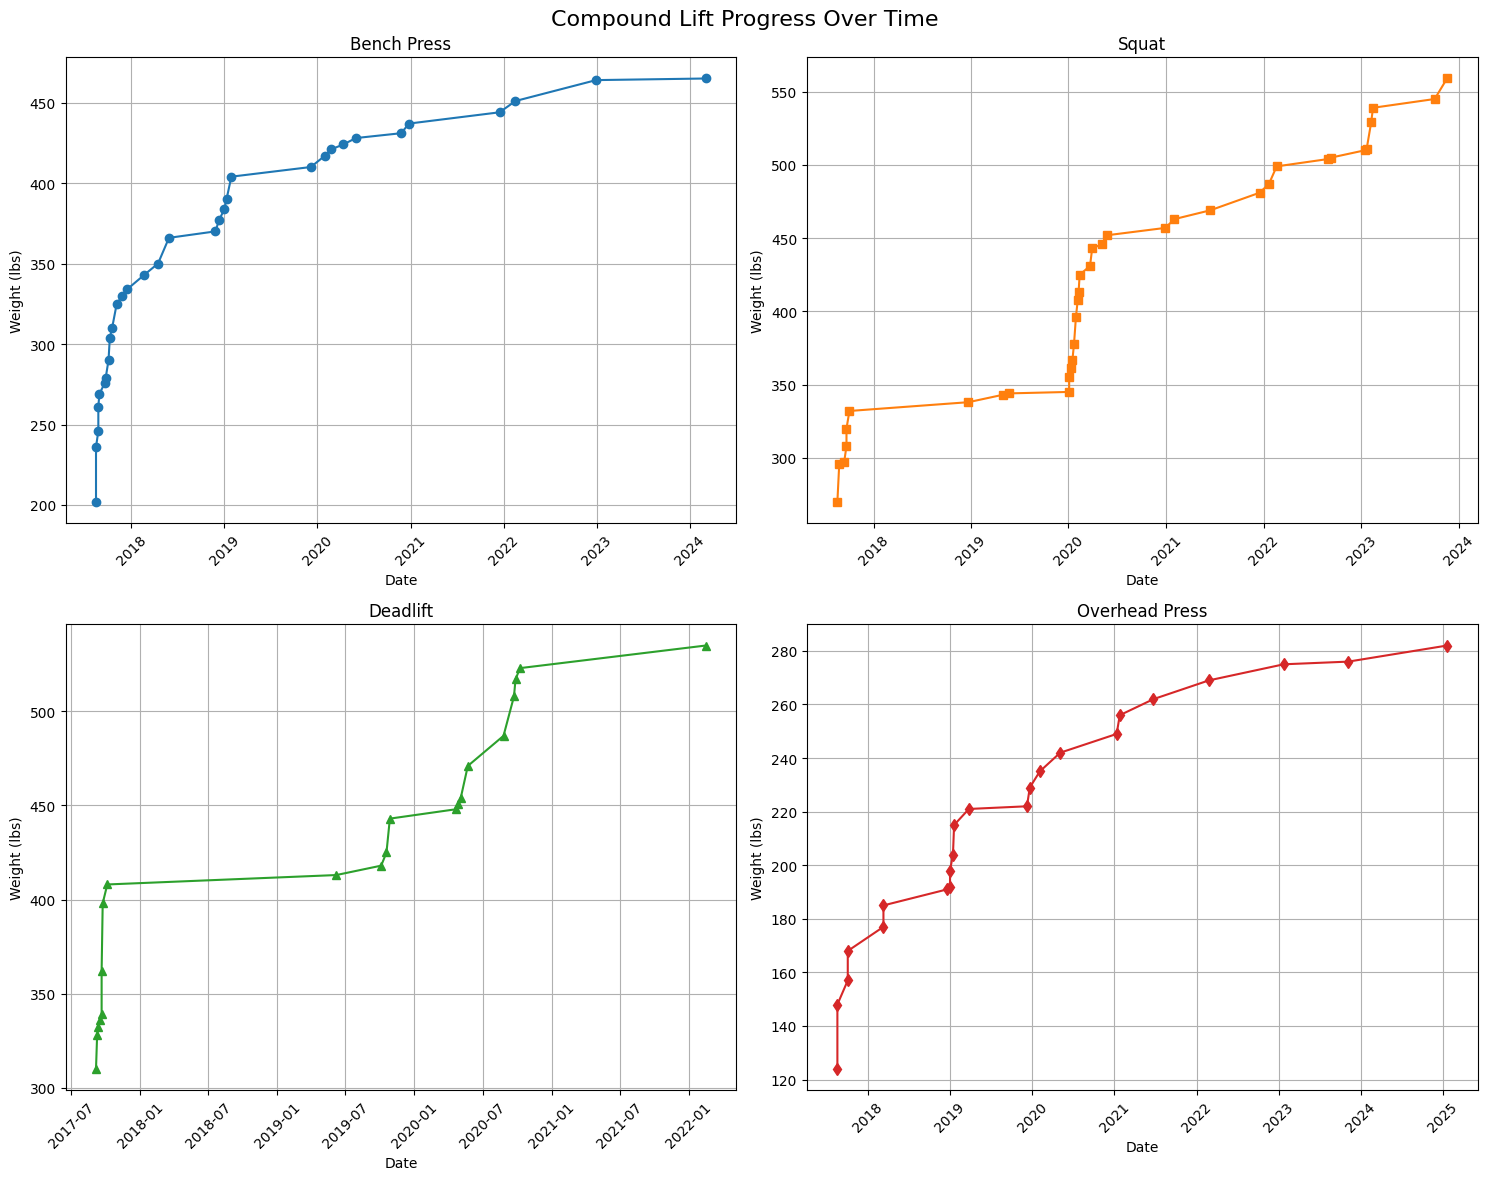

In [6]:
# Create a figure with subplots for each lift
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Compound Lift Progress Over Time', size=16)

# Plot bench press
ax1.plot(max_df["date"], max_df["weight"], marker="o", color='#1f77b4')
ax1.set_title("Bench Press")
ax1.set_xlabel("Date")
ax1.set_ylabel("Weight (lbs)")
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot squat if available
if "squat_max_df" in locals():
    ax2.plot(squat_max_df["date"], squat_max_df["weight"], marker="s", color='#ff7f0e')
ax2.set_title("Squat")
ax2.set_xlabel("Date")
ax2.set_ylabel("Weight (lbs)")
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Plot deadlift
ax3.plot(deadlift_max_df["date"], deadlift_max_df["weight"], marker="^", color='#2ca02c')
ax3.set_title("Deadlift")
ax3.set_xlabel("Date")
ax3.set_ylabel("Weight (lbs)")
ax3.grid(True)
ax3.tick_params(axis='x', rotation=45)

# Plot OHP
ax4.plot(ohp_max_df["date"], ohp_max_df["weight"], marker="d", color='#d62728')
ax4.set_title("Overhead Press")
ax4.set_xlabel("Date")
ax4.set_ylabel("Weight (lbs)")
ax4.grid(True)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


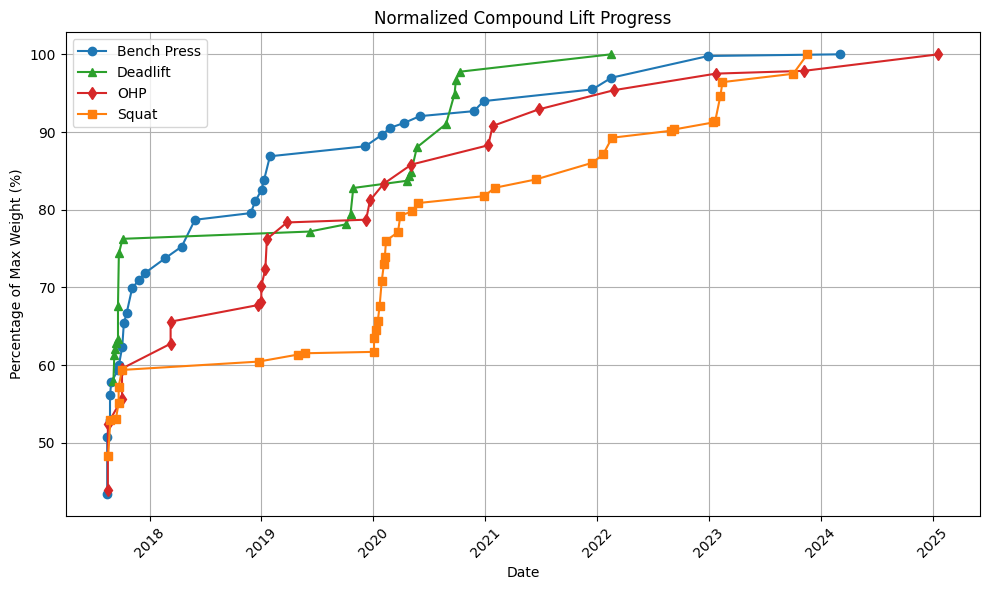

In [7]:
# Create a figure for overlaid lifts
plt.figure(figsize=(10, 6))

# Normalize each lift's weights to percentage of their max
bench_norm = max_df["weight"] / max_df["weight"].max() * 100
deadlift_norm = deadlift_max_df["weight"] / deadlift_max_df["weight"].max() * 100
ohp_norm = ohp_max_df["weight"] / ohp_max_df["weight"].max() * 100

# Plot each normalized lift
plt.plot(max_df["date"], bench_norm, marker="o", label="Bench Press", color='#1f77b4')
plt.plot(deadlift_max_df["date"], deadlift_norm, marker="^", label="Deadlift", color='#2ca02c')
plt.plot(ohp_max_df["date"], ohp_norm, marker="d", label="OHP", color='#d62728')

# Plot normalized squat if available
if "squat_max_df" in locals():
    squat_norm = squat_max_df["weight"] / squat_max_df["weight"].max() * 100
    plt.plot(squat_max_df["date"], squat_norm, marker="s", label="Squat", color='#ff7f0e')

plt.title("Normalized Compound Lift Progress")
plt.xlabel("Date")
plt.ylabel("Percentage of Max Weight (%)")
plt.grid(True)
plt.legend()
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
